# Session 10: Cluster Analysis

Instruction for using Colab: [Here](https://www.tutorialspoint.com/google_colab/google_colab_quick_guide.htm)

## Generating Data

First, we will use a really easy example to test our algorithm implementation. Our data is data points sampled from two different bivariate normal distributions. For a given data point, we will hide its label (in other word, its original distribution). By using kmeans, we are hoping to be able to cluster these points with an interesting pattern.

**More on Customizing matplotlib** <br>
Using style sheets
The style package adds support for easy-to-switch plotting “styles” with the same parameters as a matplotlibrc file (which is read at startup to configure matplotlib).

There are a number of pre-defined styles provided by matplotlib. For example, there’s a pre-defined style called “ggplot”, which emulates the aesthetics of <span style="color:blue"> ggplot </span> (a popular plotting package for R). To use this style, just add:

```python
import matplotlib.pyplot as plt
plt.style.use('ggplot')
```
To list all available styles, use:
```python
print(plt.style.available)
```
For more details go to <https://matplotlib.org/users/customizing.html>.
For a list of markers available for the argument <tt>scatter:marker</tt>: <https://matplotlib.org/api/markers_api.html#module-matplotlib.markers>.
You can play around with arguments of the `matplotlib.scatter` function to master it. For example

In [4]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import collections
import glob
import pprint
import pandas as pd
from sklearn.cluster import KMeans
# Customizing matplotlib
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

In [ ]:
# Parameters of the simulated mutivariate gaussian distribution
mean_d1 = [0, 0]
mean_d2 = [5, 5]
cov = [[1, 0], [0, 1]] 
x1, y1 = np.random.multivariate_normal(mean_d1, cov, 5000).T
x2, y2 = np.random.multivariate_normal(mean_d2, cov, 5000).T
color = np.array(["red" for i in range(5000)]+["blue" for i in range(5000)]) 

# Hide our labels
x = np.concatenate((x1,x2),axis=0)
y = np.concatenate((y1,y2),axis=0)

In [ ]:
x.shape

(10000,)

In [ ]:
data = pd.DataFrame(data=np.hstack((x.reshape(-1,1), y.reshape(-1,1))),columns=['x','y'])

Text(0, 0.5, 'y')

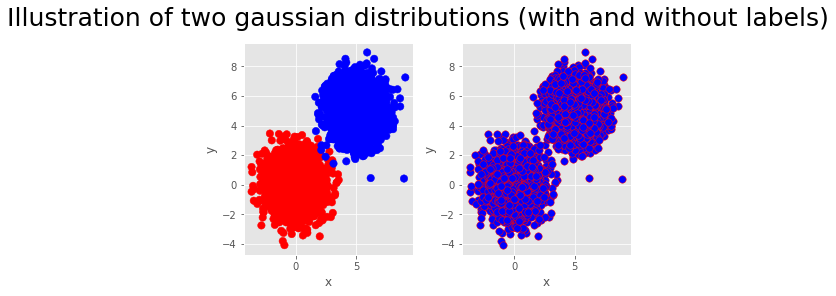

In [ ]:
# Plot
fig, axs = plt.subplots(1, 2, constrained_layout=True)
axs[0].scatter([x1,x2], [y1,y2],color=color,s=220, marker=".")
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
fig.suptitle('Illustration of two gaussian distributions (with and without labels)', fontsize=25)

axs[1].scatter(x,y, c="blue", s=220, marker=".", edgecolors = "red")
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

In [ ]:
# Number of clusters
kmeans = KMeans(n_clusters=2)
# Fitting the input data
kmeans = kmeans.fit(data)
# Getting the cluster labels
labels = kmeans.predict(data)
print('The labels associated with the observations are:', labels)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print('The centroids associated with the clusters are:', centroids) # From sci-kit learn

The labels associated with the observations are: [1 1 1 ... 0 0 0]
The centroids associated with the clusters are: [[ 5.01207639  5.01537114]
 [-0.01450022 -0.0138721 ]]


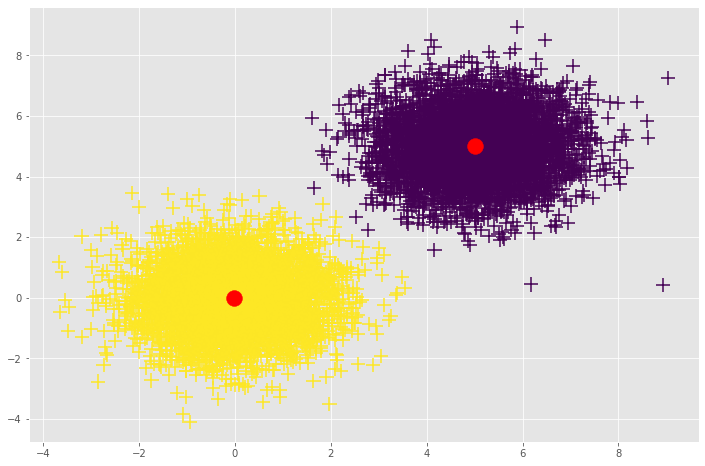

In [ ]:
figsize = plt.figure(figsize = (12,8))
plot = plt.scatter(x, y, c= labels, s=200, marker = "+") 
plot = plt.scatter(centroids[:,0], centroids[:,1], c='red', s=1000, marker = ".") # marker: shape of points

## Hierarchical Clustering via Scikit-Learn

### Example 1

#### Preparation

+ Loading Required Libraries
+ Preparing Notebook
+ Generating Data

In [ ]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering

# from sklearn.cluster import KMeans       # ----> for k-means

from sklearn.datasets import make_blobs    # ----> for data generation

# Creating a sample dataset with k clusters and Dim demensions
k_true = 4
Dim = 3
X, y = make_blobs(n_samples=800, n_features = Dim, centers = k_true)

plt.rcParams['figure.figsize'] = (12, 8)

#### Raw Data Visualization

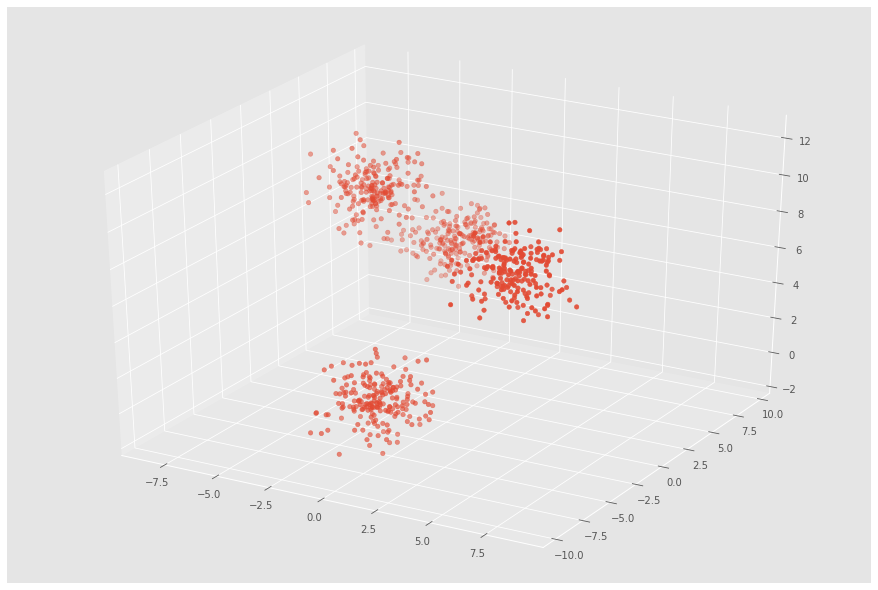

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

Next, we need to decide the number of clusters that we want our data to be split to. To this end, we will use the ```scipy``` library to create a dendrogram. Then, base on the dendrogram we choose the number of clusters. 

#### Building Dendrogram

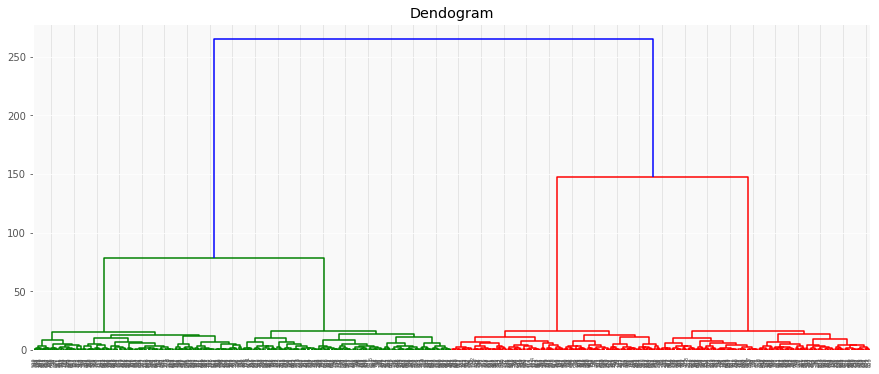

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 6))  
plt.title("Dendogram")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))  

Z: [idx1, idx2, dist, sample_count]

In [ ]:
Z = shc.linkage(X, method='ward')

In [ ]:
Z[0]

array([1.77000000e+02, 4.33000000e+02, 2.39299422e-02, 2.00000000e+00])

In [ ]:
Z[20:40]

array([[5.46000000e+02, 6.29000000e+02, 1.42096623e-01, 2.00000000e+00],
       [1.74000000e+02, 6.58000000e+02, 1.42130598e-01, 2.00000000e+00],
       [3.15000000e+02, 4.40000000e+02, 1.42286690e-01, 2.00000000e+00],
       [2.69000000e+02, 4.89000000e+02, 1.42797873e-01, 2.00000000e+00],
       [6.42000000e+02, 6.51000000e+02, 1.44182004e-01, 2.00000000e+00],
       [6.01000000e+02, 7.89000000e+02, 1.48907096e-01, 2.00000000e+00],
       [1.52000000e+02, 2.47000000e+02, 1.49330201e-01, 2.00000000e+00],
       [4.60000000e+01, 7.76000000e+02, 1.50290669e-01, 2.00000000e+00],
       [3.31000000e+02, 6.84000000e+02, 1.50400608e-01, 2.00000000e+00],
       [4.86000000e+02, 7.72000000e+02, 1.51052755e-01, 2.00000000e+00],
       [2.12000000e+02, 2.72000000e+02, 1.55414574e-01, 2.00000000e+00],
       [3.30000000e+01, 4.50000000e+02, 1.56099203e-01, 2.00000000e+00],
       [1.10000000e+02, 3.64000000e+02, 1.60829701e-01, 2.00000000e+00],
       [2.51000000e+02, 5.31000000e+02, 1.64499359e

In [ ]:
Z[-8:]

array([[1578.        , 1585.        ,   13.55862388,  128.        ],
       [1579.        , 1589.        ,   15.76334599,  200.        ],
       [1584.        , 1588.        ,   16.25443702,  200.        ],
       [1583.        , 1590.        ,   16.3065004 ,  200.        ],
       [1582.        , 1591.        ,   16.5149774 ,  200.        ],
       [1592.        , 1595.        ,   78.20632522,  400.        ],
       [1593.        , 1594.        ,  147.21179529,  400.        ],
       [1596.        , 1597.        ,  264.82923948,  800.        ]])

**Ward's method** <br>
In hierarchical cluster analysis, *Ward's method* or *Ward's minimum variance method* is a special case of the **objective function approach** originally presented by Joe H. Ward, Jr. <br>
Ward's minimum variance criterion **minimizes the total within-cluster variance**. In other words, at each step it finds the pair of clusters that leads to minimum increase in total within-cluster variance after merging. 

This objective function could be "any function that reflects the investigator's purpose". To illustrate the procedure, Ward used the example where the objective function is the **error sum of squares**, and this example is known as Ward's method or more precisely Ward's minimum variance method.

Now, draw a horizontal line that passes through longest vertical line without a horizontal line:

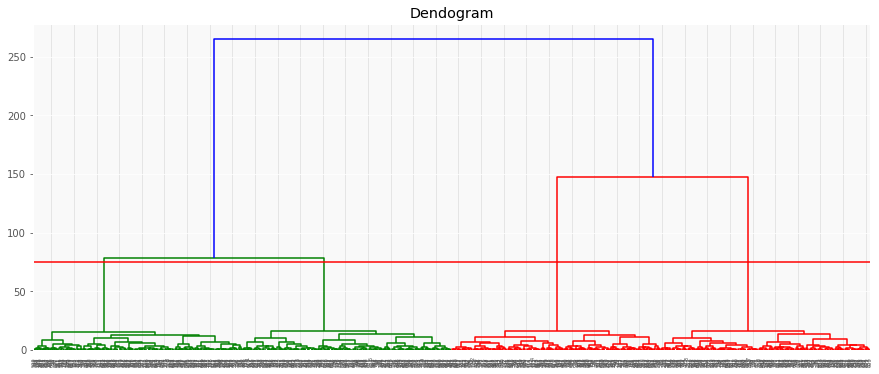

In [ ]:
plt.figure(figsize=(15, 6))  
plt.title("Dendogram")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))  
plt.axhline(y=75, color='r', linestyle='-')

Number of clusters according to the above figure will be $4$. The next step is to use the `AgglomerativeClustering` class of the `sklearn.cluster library` to assign each point to a cluster:

In [ ]:
cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')  
cluster.fit(X)
labels = cluster.fit_predict(X)
labels[0:10]

array([1, 0, 2, 1, 2, 0, 0, 1, 3, 0])

**`AgglomerativeClustering` Linkage Parameter:** <br>
linkage : {“ward”, “complete”, “average”, “single”}, optional (default=”ward”)
Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

ward minimizes the variance of the clusters being merged.
average uses the average of the distances of each observation of the two sets.
complete or maximum linkage uses the maximum distances between all observations of the two sets.
single uses the minimum of the distances between all observations of the two sets.

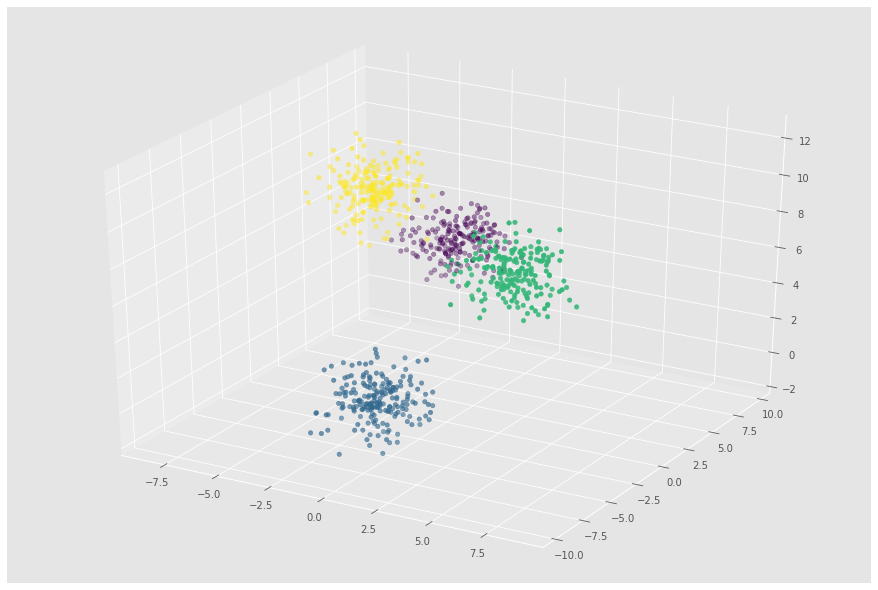

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
scatt = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels)

### Choosing the Value of $K$

In many cases the value of $K$ may be known a priori. If not, one can use the so-called **Elbow Method**.

The KElbowVisualizer implements the “elbow” method to help select the optimal number of clusters by fitting the model with a range of values for $K$. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line.

To demonstrate, in the following example the KElbowVisualizer fits the KMeans model for a range of K values from $4$ to $11$ on a sample two-dimensional dataset with $8$ random clusters of points. When the model is fit with $8$ clusters, we can see a line annotating the “elbow” in the graph, which in this case we know to be the optimal number.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ff892d44590>,
                 k=None, metric=None, model=None, timings=True)

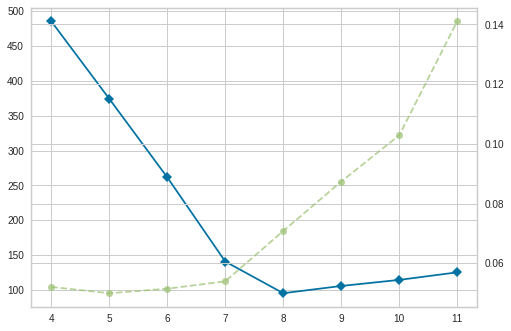

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer

It is important to remember that the “elbow” method does not work well if the data is not very clustered. In this case, you might see a smooth curve and the optimal value of $K$ will be unclear.

## Image Quantization
Now we try hierarchical clustering and kmeans to quantize an image.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Lenna.png to Lenna.png


In [145]:
import skimage.io as io

nested_arrays = io.imread('boat.jpg')

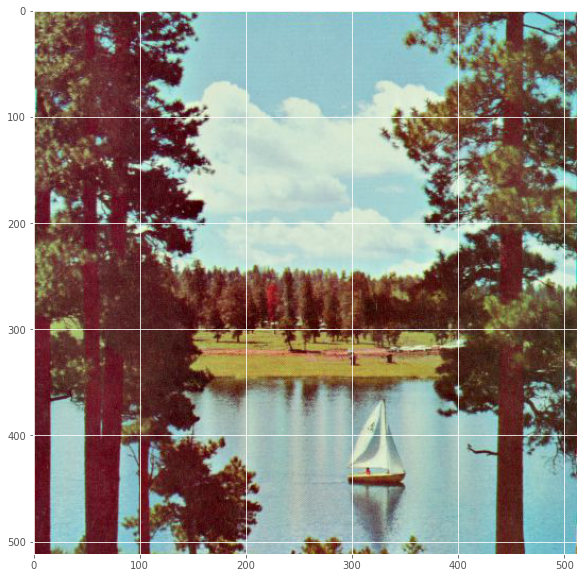

In [146]:

# Visualize the image
imgplot = plt.imshow(nested_arrays)

In [147]:
# The image is composed of 3 channels. The dimension of the image is 400 x 400. 
nested_arrays.shape

(512, 512, 3)

In [148]:
# Check for the first channel 
nested_arrays[:,:,0]

array([[ 82,  65,   8, ..., 125, 135, 125],
       [112, 156, 128, ..., 174, 184, 170],
       [ 93, 165, 145, ..., 116, 121,  95],
       ...,
       [ 89, 105,  94, ..., 109, 154, 178],
       [ 87, 107,  92, ..., 104, 151, 175],
       [ 85, 106,  87, ..., 115, 160, 183]], dtype=uint8)

In [149]:
np.unique(nested_arrays[:,:,0])

array([  0,   1,   5,   8,   9,  10,  11,  13,  17,  18,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 19

## Understanding a digital image:
* 3 Channels: RGB; R=Red, G = Green, B = Blue
* Each pixel is represented with 8 bits for each channel.
* Value at each pixel is represented by 3 values (RGB), varying from 0 to 255 (2^8 distinct values).

In [150]:
# Check the values obtained for the green channel.
np.unique(nested_arrays[:,:,2].flatten())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [151]:
I_red = nested_arrays.copy()  # Duplicate image
I_red[:, :, 1] = 0    # Zero out contribution from green
I_red[:, :, 2] = 0    # Zero out contribution from blue

I_blue = nested_arrays.copy()  # Duplicate image
I_blue[:, :, 0] = 0    # Zero out contribution from red
I_blue[:, :, 1] = 0    # Zero out contribution from green

I_green = nested_arrays.copy()  # Duplicate image
I_green[:, :, 0] = 0    # Zero out contribution from red
I_green[:, :, 2] = 0    # Zero out contribution from blue

[]

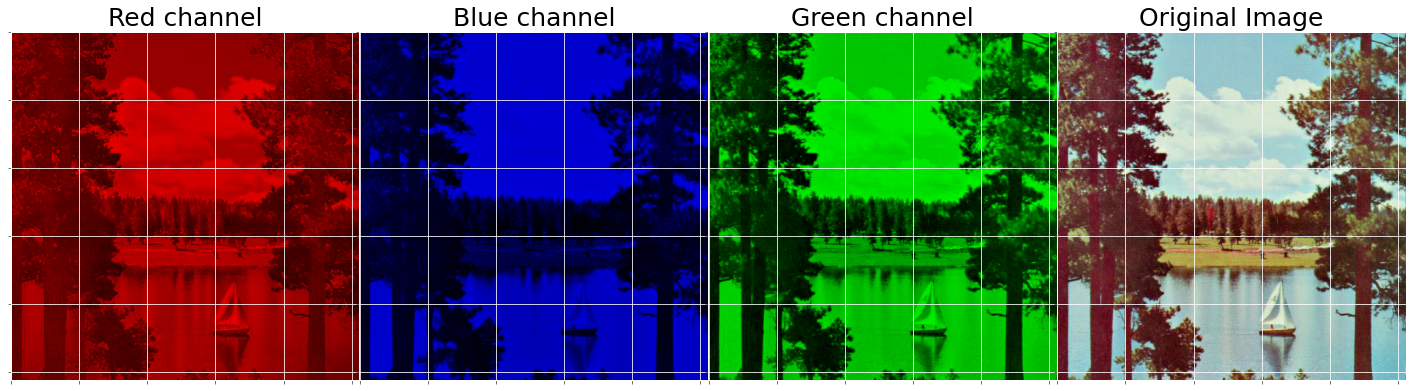

In [152]:
# Plot the different channels
fig, axs = plt.subplots(1, 4,figsize=(25,25))
fig.subplots_adjust(wspace=0, hspace=0)
axs[0].imshow(I_red)
axs[0].set_title(r'Red channel', fontsize=25)
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])

axs[1].imshow(I_blue)
axs[1].set_title(r'Blue channel', fontsize=25)
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])
axs[2].imshow(I_green)
axs[2].set_title(r'Green channel', fontsize=25)
axs[2].set_xticklabels([])
axs[2].set_yticklabels([])
axs[3].imshow(nested_arrays)
axs[3].set_title(r'Original Image', fontsize=25)
axs[3].set_xticklabels([])
axs[3].set_yticklabels([])

In [153]:
def plots_side_by_side(images_list, images_title):
    num_images = len(images_list)
    fig, axs = plt.subplots(1, num_images,figsize=(25,25))
    fig.subplots_adjust(wspace=0, hspace=0)
    for i in range(num_images):
        axs[i].imshow(images_list[i])
        axs[i].set_title(images_title[i], fontsize=25)
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])

In [154]:
# Flatten each color channel
flat_list_image = np.array([item for sublist in nested_arrays for item in sublist],dtype='f')

In [155]:
flat_list_image.shape

(262144, 3)

= 512*512, 3

In [156]:
# Check the shape
flat_list_image

array([[ 82.,   0.,  67.],
       [ 65.,   1.,  79.],
       [  8.,   0.,  52.],
       ...,
       [115., 183., 204.],
       [160., 172., 150.],
       [183., 138.,  71.]], dtype=float32)

## Kmeans

In [157]:
# Apply kmeans algorithm
K = 5
kmeans = KMeans(n_clusters=K, random_state=0).fit(flat_list_image)
calculated_labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [158]:
centers

array([[201.35333 , 224.9017  , 210.23329 ],
       [ 85.2385  ,  33.730286,  32.254128],
       [146.67403 , 142.42389 , 105.70333 ],
       [153.25832 , 194.51779 , 193.21194 ],
       [110.151436,  80.747086,  63.869728]], dtype=float32)

In [159]:
calculated_labels.shape

(262144,)

In [160]:
np.unique(calculated_labels)

array([0, 1, 2, 3, 4], dtype=int32)

In [161]:
centers_list = [centers[label] for label in calculated_labels]

In [162]:
# centers_list

In [163]:
# Prepare the new image
new_center_list = np.vstack(centers_list)
nested_center_list = []
image_length = nested_arrays.shape[0]
for i in range(image_length):
    nested_center_list.append(new_center_list[(i*image_length):((i+1)*image_length)])

In [164]:
H = np.array(nested_center_list,np.int32)

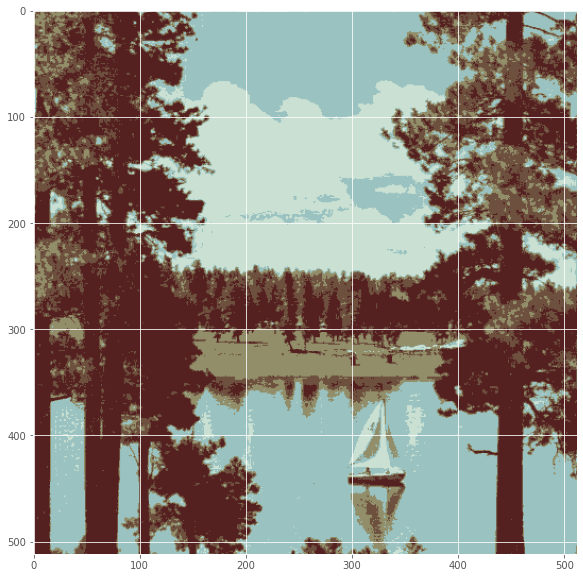

In [165]:
imgplot = plt.imshow(H)

In [166]:
def image_quantization(image, K, seed):
    """
    Quantize an image in fewer colors so that it takes less memory.
    image: image presented as a numpy 3D array.
    K: Number of clusters for our clustering.
    seed: For reproductibility.
    """
    # Clustering
    flat_list_image = np.array([item for sublist in image for item in sublist],dtype='f') # Image Flattening
    kmeans = KMeans(n_clusters=K, random_state=seed).fit(flat_list_image)
    calculated_labels = kmeans.labels_
     
    centers = kmeans.cluster_centers_
    centers_list = [centers[label] for label in calculated_labels]
    
    # Prepare the image
    new_center_list = np.vstack(centers_list)
    nested_center_list = []
    image_width = nested_arrays.shape[0]
    for i in range(image_length):
        nested_center_list.append(new_center_list[(i*image_width):((i+1)*image_width)])
    return np.array(nested_center_list,np.int32)

In [167]:
H2 = image_quantization(nested_arrays, 2, 0)
H4 = image_quantization(nested_arrays, 4, 0)
H8 = image_quantization(nested_arrays, 8, 0)
H16 = image_quantization(nested_arrays, 16, 0)

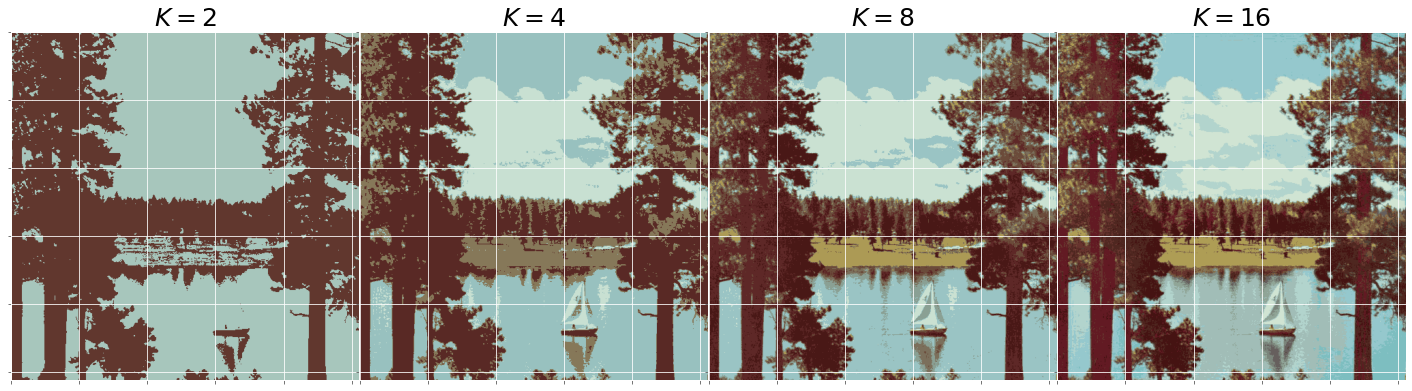

In [168]:
images_list = [H2,H4,H8,H16]
images_titles = ['$K=2$','$K=4$','$K=8$','$K=16$']
plots_side_by_side(images_list, images_titles)

##Q. Any advantages of image quantization?

Q. How is the memory usage reduced?